In [1]:
import numpy as np
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib notebook

mpl.rcParams['axes.spines.top'] = 0
mpl.rcParams['axes.spines.right'] = 0
mpl.rcParams['axes.spines.left'] = 1
mpl.rcParams['axes.spines.bottom'] = 1
mpl.rcParams.update({'font.size': 12})

# Lecture 8: Boundary detection + convolutional filters
## Pattern Recognition, Fall 2022

**Ivan Dokmanić**


<img src="figs/sada-unibas-0.svg" width="60%" float="left">


# Last time

- A slow review of logistic regression
- We started talking about edge / bounary detection


# Today

- Towards better features for edge detection
- Understand notions of filtering and convolution

# Quiz

1. What is the difference between _edge_ detection and _boundary_ detection? Why are both tasks challenging?
2. What issues arise when using simple image gradient to detect edges?
3. What possible improvements can you think of?

# Edge / boundary / contour detection 

![image.png](figs/canny.png)
JonMcLoone

# Challenging and ill-posed

![image.png](figs/be-challenge.png)

Slide credit: Alex Schwing; image credits tbd

# People and algorithms do different things

In [2]:
from scipy.io import loadmat
from skimage import color
from skimage import io

img = io.imread("/Users/dokman0000/Downloads/BSR500/BSDS500/data/images/train/65010.jpg")

fig, ax = plt.subplots(1, 1)
ax.imshow(img)
ax.axis('off');

ModuleNotFoundError: No module named 'skimage'

<IPython.core.display.Javascript object>


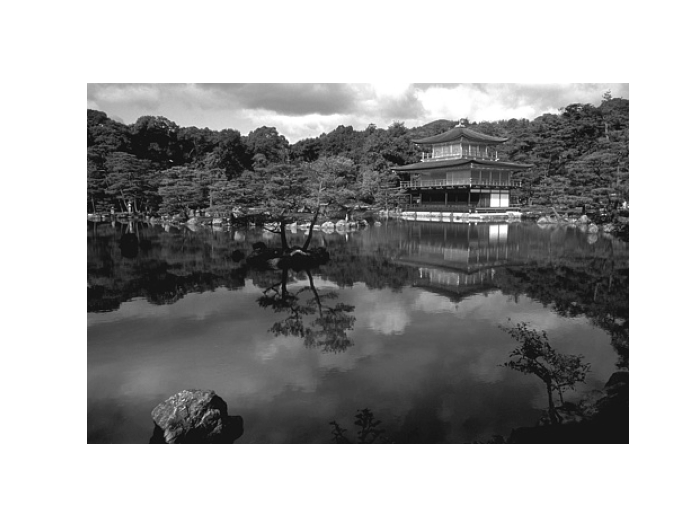

In [3]:
img_bw = color.rgb2gray(img)

fig, ax = plt.subplots(1, 1)
ax.imshow(img_bw, cmap='gray')
ax.axis('off');

<IPython.core.display.Javascript object>


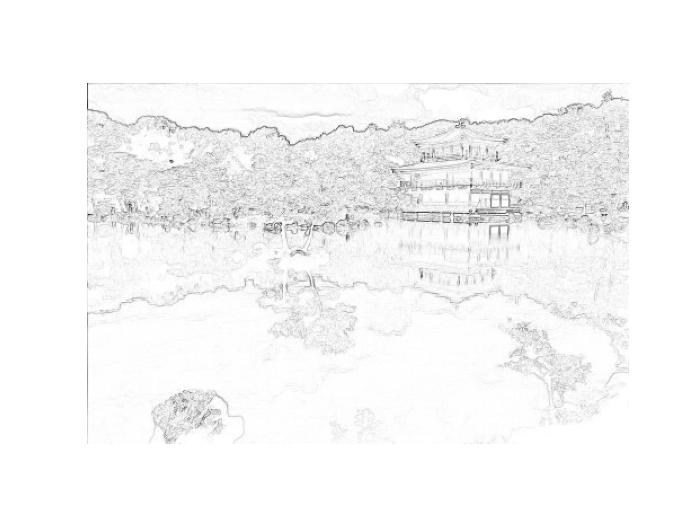

(-0.5, 480.5, 320.5, -0.5)

In [4]:
img_dx = np.diff(img_bw, axis=0, prepend=0)
img_dy = np.diff(img_bw, axis=1, prepend=0)
gradnorm = np.sqrt(img_dx**2 + img_dy**2)

fig, ax = plt.subplots(1, 1)
ax.imshow(-gradnorm, cmap='gray')
ax.axis('off')

<IPython.core.display.Javascript object>


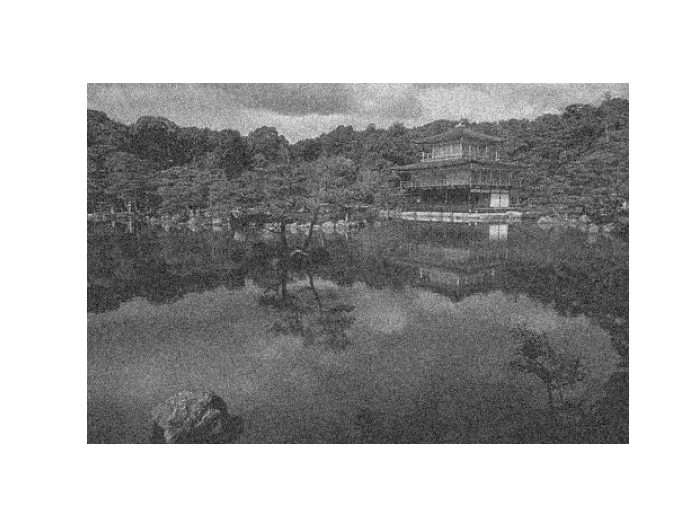

(-0.5, 480.5, 320.5, -0.5)

In [5]:
sig = 0.1
img_bw_n = img_bw + sig*np.random.randn(*img_bw.shape)
fig, ax = plt.subplots(1, 1)
ax.imshow(img_bw_n, cmap='gray')
ax.axis('off')

<IPython.core.display.Javascript object>


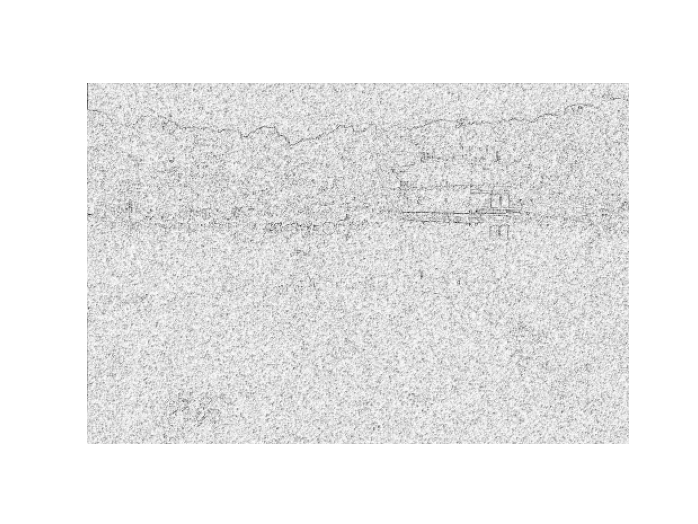

(-0.5, 480.5, 320.5, -0.5)

In [6]:
img_dx = np.diff(img_bw_n, axis=0, prepend=0)
img_dy = np.diff(img_bw_n, axis=1, prepend=0)
gradnorm = np.sqrt(img_dx**2 + img_dy**2)

fig, ax = plt.subplots(1, 1)
ax.imshow(-gradnorm, cmap='gray')
ax.axis('off')

<IPython.core.display.Javascript object>


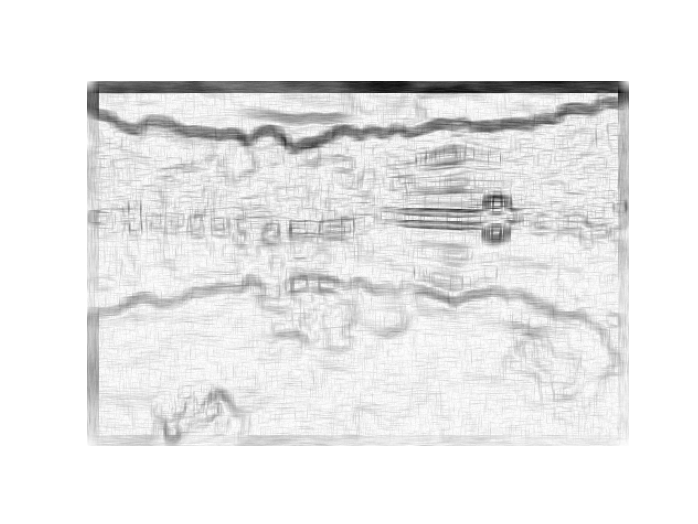

In [44]:
# let us average each pixels with its neighbors
from scipy.signal import convolve2d

# I will use the magical "convolution"
s = 11
h = np.ones((s, s)) / s**2
img_filt = convolve2d(img_bw_n, h)

img_dx = np.diff(img_filt, axis=0, prepend=0)
img_dy = np.diff(img_filt, axis=1, prepend=0)
gradnorm = np.sqrt(img_dx**2 + img_dy**2)
fig, ax = plt.subplots(1, 1)
ax.imshow(-gradnorm, cmap='gray')
ax.axis('off');

# Filtering and convolution

# Filtering and convolution

<br>
<div>
<img src="figs/behringer.png" width="50%"/>
</div>

# Filtering and convolution

- Edges are high frequencies
- A differentiator is a "high-pass filter"
- There you go!

# What is a filter?

For us, in this lecture: a linear, shift-invariant system

- Important: real perceptual filter are not linear (see below)

What do these words mean?

- Linear we know by now!
- Shift-invariant: do the same thing everywhere
- More precise: shift-equivariant

$$
    \mathcal{H} (x[\cdot - \mathbf{u}]) = (\mathcal{H} x)[\cdot - \mathbf{u}]
$$

# Convolution 

## Discrete 1D signals (audio)

Ingredients: a "signal" $x$, a "filter" $h$

$$
    (x \ast h)[t] = \sum_{\tau = -\infty}^\infty x[t] h[\tau - t] 
$$

## Discrete 2D signals (images)

$$
    (x \ast h)[\mathbf{u}] = \sum_{\mathbf{v} \in \mathbb{Z}^2} x[\mathbf{v}] h[\mathbf{u} - \mathbf{v}]
$$



# Convolution 

## Continuous 1D signals (audio)

Ingredients: a "signal" $x$, a "filter" $h$

$$
    (x \ast h)(t) = \int_{-\infty}^{\infty} x(\tau) h(t - \tau) d \tau = \int_{-\infty}^{\infty} h(\tau) x(t - \tau) d \tau
$$

## Continuous 2D signals (images)

$$
    (x \ast h)(\mathbf{u}) = \iint_{\mathbb{R}^2} x(\mathbf{v}) h(\mathbf{u} - \mathbf{v}) d \mathbf{v} =  \iint_{\mathbb{R}^2} h(\mathbf{v}) u(\mathbf{u} - \mathbf{v}) d \mathbf{v}
$$



# A very cool demo

https://poloclub.github.io/cnn-explainer/

# Why worry about convolution?

# Convolution in audio processing

In [45]:
from scipy.io import wavfile
from IPython.lib.display import Audio

fs, h_cathedral = wavfile.read('/Users/dokman0000/Dropbox/Personal/# Unsorted/__BACKUP/drvo/nastava/EPFL/coursera-signal-processing/example-aec/h-cathedral.wav')
fs, h_bc = wavfile.read('/Users/dokman0000/Dropbox/Personal/# Unsorted/__BACKUP/drvo/nastava/EPFL/coursera-signal-processing/example-aec/h-bc329.wav')
fs, x = wavfile.read('/Users/dokman0000/Dropbox/Personal/# Unsorted/__BACKUP/drvo/nastava/EPFL/coursera-signal-processing/example-aec/noreverb.wav')

Audio(h_bc, rate=fs, autoplay=False)

In [46]:
from scipy.signal import fftconvolve

x_cathedral = fftconvolve(x, h_cathedral)

Audio(x_cathedral, rate=fs, autoplay=False)

In [41]:
L = int(fs / 1000)

h_lp = np.ones((L, )) / L
x_lp = fftconvolve(x, h_lp, mode='same')
Audio(np.diff(np.diff(x)), rate=fs, autoplay=False)

# Hearing and the cochlea

<br>

<div>
<img src="figs/cochlea.png" width="50%" />
</div>


![image.png](figs/gammatone.png)

Credit: Dick Lyon

# Back to edge / boundary detection

We are taking a first difference

    img_dx = np.diff(img_bw, axis=0, prepend=0)

This can be written as a filter, a convolution!

Let

$$
    h_v = 
    \begin{bmatrix}
    1 & 0 \\ -1 & 0
    \end{bmatrix}
$$

Then for an image $x$ we have

$$
\begin{align}
    (x \ast h)[u_1, u_2] 
    &= \sum_{v_1 = -\infty}^\infty \sum_{v_2 = -\infty}^\infty h[v_1, v_2] x[u_1 - v_1, u_2 - v_2]\\
    &= \sum_{v_1 = 0}^1 \sum_{v_2 = 0}^0 h[v_1, v_2] x[u_1 - v_1, u_2 - v_2] \\
    &= 1 \cdot x[u_1 - 0, u_2 - 0] + (-1) \cdot  x[u_1 - 1, u_2 - 0] \\
    &= x[u_1, u_2] - x[u_1 - 1, u_2]
\end{align}
$$

Similarly we obtain

$$
\begin{align}
    (x \ast h_h)[u_1, u_2] = x[u_1, u_2] - x[u_1, u_2 - 1]
\end{align}
$$

In [137]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(np.array([[1], [-1]]))
axs[1].imshow(np.array([[1, -1]]))
axs[0].axis(False)
axs[1].axis(False)

<IPython.core.display.Javascript object>

(-0.5, 1.5, 0.5, -0.5)

# How do people detect edges?

# Vision and V1
<br>
<div>
<img src="figs/v1.png" height="60%" /img>
</div>

![image.png](figs/gabor.png)

Primary visual cortex (V1) $\approx$ Gabor filter (Adelson & Bergen (1985); Jones & Palmer, 1987; Kay et al., 2008))

# Convolutional neural networks

<br>

<div>
<img src="figs/fergus.png" height="70%" />
</div>



# Multiscale directional filter banks

**Multiscale** = filters of different sizes

**Directional** = oriented filters

- Mimicking our visual system!
- Curvelets, contourlets, Leung–Malick, Mallat's oriented wavelets, ...


A question: do we understand what we mean by "filter" now?


In [50]:
'''
The Leung-Malik (LM) Filter Bank, implementation in python

T. Leung and J. Malik. Representing and recognizing the visual appearance of
materials using three-dimensional textons. International Journal of Computer
Vision, 43(1):29-44, June 2001.

Reference: http://www.robots.ox.ac.uk/~vgg/research/texclass/filters.html
'''

import numpy as np
import matplotlib.pyplot as plt

def gaussian1d(sigma, mean, x, ord):
    x = np.array(x)
    x_ = x - mean
    var = sigma**2

    # Gaussian Function
    g1 = (1/np.sqrt(2*np.pi*var))*(np.exp((-1*x_*x_)/(2*var)))

    if ord == 0:
        g = g1
        return g
    elif ord == 1:
        g = -g1*((x_)/(var))
        return g
    else:
        g = g1*(((x_*x_) - var)/(var**2))
        return g

def gaussian2d(sup, scales):
    var = scales * scales
    shape = (sup,sup)
    n,m = [(i - 1)/2 for i in shape]
    x,y = np.ogrid[-m:m+1,-n:n+1]
    g = (1/np.sqrt(2*np.pi*var))*np.exp( -(x*x + y*y) / (2*var) )
    return g

def log2d(sup, scales):
    var = scales * scales
    shape = (sup,sup)
    n,m = [(i - 1)/2 for i in shape]
    x,y = np.ogrid[-m:m+1,-n:n+1]
    g = (1/np.sqrt(2*np.pi*var))*np.exp( -(x*x + y*y) / (2*var) )
    h = g*((x*x + y*y) - var)/(var**2)
    return h

def makefilter(scale, phasex, phasey, pts, sup):

    gx = gaussian1d(3*scale, 0, pts[0,...], phasex)
    gy = gaussian1d(scale,   0, pts[1,...], phasey)

    image = gx*gy

    image = np.reshape(image,(sup,sup))
    return image

def makeLMfilters():
    sup     = 49
    scalex  = np.sqrt(2) * np.array([1,2,3])
    norient = 6
    nrotinv = 12

    nbar  = len(scalex)*norient
    nedge = len(scalex)*norient
    nf    = nbar+nedge+nrotinv
    F     = np.zeros([sup,sup,nf])
    hsup  = (sup - 1)/2

    x = [np.arange(-hsup,hsup+1)]
    y = [np.arange(-hsup,hsup+1)]

    [x,y] = np.meshgrid(x,y)

    orgpts = [x.flatten(), y.flatten()]
    orgpts = np.array(orgpts)

    count = 0
    for scale in range(len(scalex)):
        for orient in range(norient):
            angle = (np.pi * orient)/norient
            c = np.cos(angle)
            s = np.sin(angle)
            rotpts = [[c+0,-s+0],[s+0,c+0]]
            rotpts = np.array(rotpts)
            rotpts = np.dot(rotpts,orgpts)
            F[:,:,count] = makefilter(scalex[scale], 0, 1, rotpts, sup)
            F[:,:,count+nedge] = makefilter(scalex[scale], 0, 2, rotpts, sup)
            count = count + 1

    count = nbar+nedge
    scales = np.sqrt(2) * np.array([1,2,3,4])

    for i in range(len(scales)):
        F[:,:,count]   = gaussian2d(sup, scales[i])
        count = count + 1

    for i in range(len(scales)):
        F[:,:,count] = log2d(sup, scales[i])
        count = count + 1

    for i in range(len(scales)):
        F[:,:,count] = log2d(sup, 3*scales[i])
        count = count + 1

    return F

In [51]:
F = makeLMfilters()

fig, axs = plt.subplots(6, 8, figsize=(10, 6))

for i in range(48):
    axs[i//8, i%8].imshow(F[:, :, i])
    axs[i//8, i%8].axis(False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


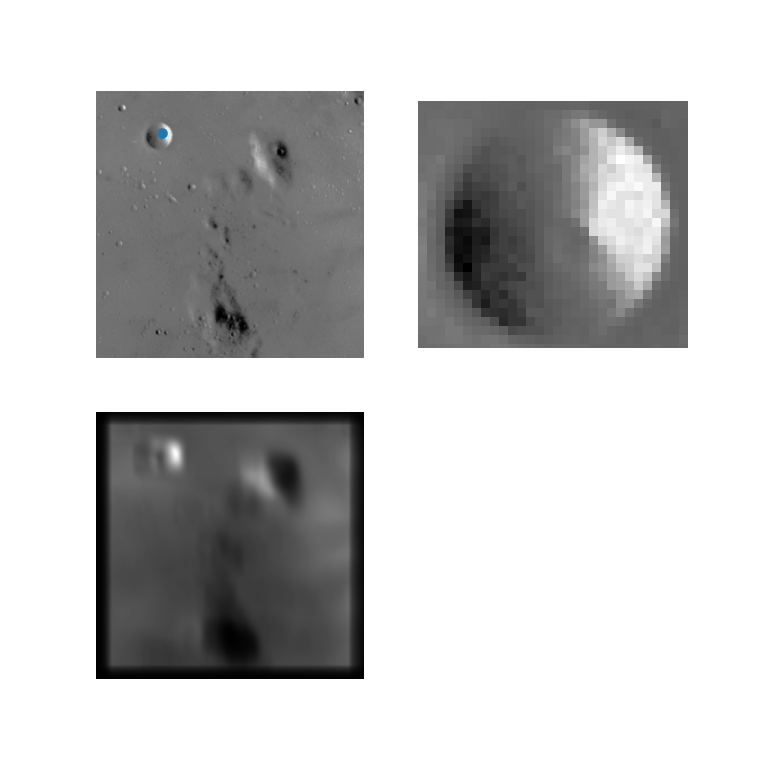

In [138]:
moon = skimage.data.moon()
moon = moon / moon.max()

fig, axs = plt.subplots(2, 2, figsize=(7, 7))
[ax.set_axis_off() for ax in axs.ravel()]

crater = moon[60:115, 90:150]
crater /= crater.max()
moonfilt = fftconvolve(moon, crater, mode='same')

axs[0, 0].imshow(moon, cmap='gray')
axs[0, 1].imshow(crater, cmap='gray')
axs[1, 0].imshow(moonfilt**5, cmap='gray')
x_max, y_max = np.unravel_index(moonfilt.argmax(), moonfilt.shape)
axs[0, 0].scatter(y_max - crater.shape[0]//2, x_max) # todo: figure this out

In [75]:
import skimage
from scipy.signal import fftconvolve

image = skimage.data.text().astype(float)
image /= image.max()
x_filt = fftconvolve(image, F[:, :, 47], mode='same')
x_filt /= x_filt.max()

fig, axs = plt.subplots(2, 2, figsize=(10, 4))
axs[0, 0].imshow(image)
imobj = axs[1, 0].imshow(x_filt)
filt48 = F[:, :, 47]
filt48 /= filt48.max()
filtobj = axs[1, 1].imshow(filt48)
axs[0, 1].axis(False)


def update(filtid=47):
    y = fftconvolve(image, F[:, :, filtid], mode='same')
    y /= y.max()
    imobj.set_data(y)
    filt = F[:, :, filtid]
    filt /= filt.max()
    filtobj.set_data(filt)
    fig.canvas.draw_idle()

interact(update, filtid=(0, 47, 1));

<IPython.core.display.Javascript object>

interactive(children=(IntSlider(value=47, description='filtid', max=47), Output()), _dom_classes=('widget-inte…

# What did we learn today?

- The idea of filters and filter banks
- Importance of convolution in audio and image processing
- Neural basis of hearing and vision
- Our first multiscale, directional filter bank

## Next time

- Apply all this to boundary detection and connect with the Fourier transform!

## Quiz

- We saw that it is beneficial to apply a Gaussian filter to an image before computing the derivatives (due to noise). We also saw that the Gaussian filtering is achieved by convolution, and discrete derivatives can also be written as filters, or convolutions. Applying two filters in series can be written as one effective filter. What is this effective filter in our case?

<IPython.core.display.Javascript object>


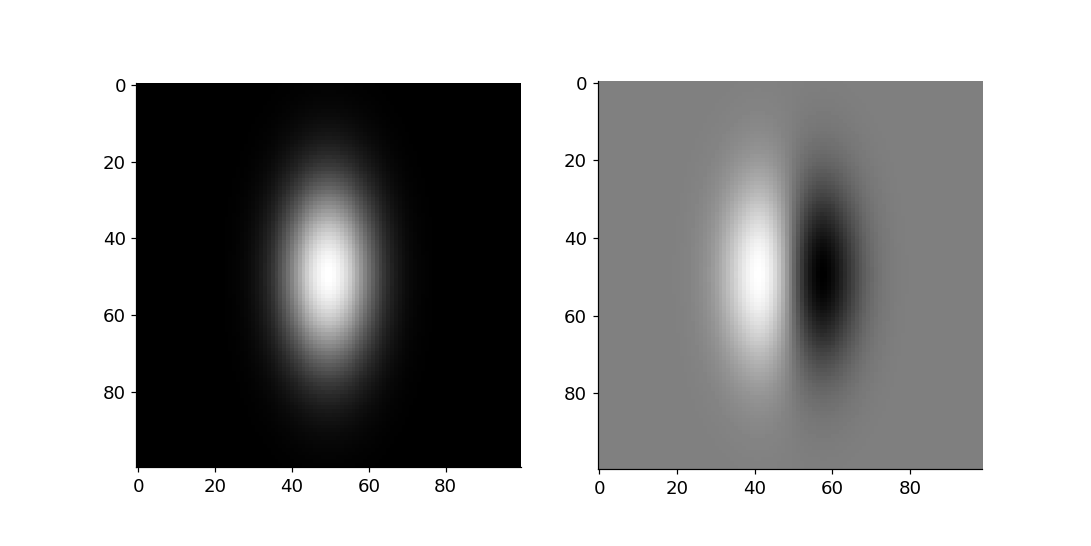

In [135]:
a = 3
x_ = np.linspace(-a, a, 100)
y_ = np.linspace(-a, a, 100)
xx, yy = np.meshgrid(x_, y_)
h_gauss = np.exp(  -((2*xx)**2 + yy**2) / 2 )

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(h_gauss, cmap='gray')
axs[1].imshow(np.diff(h_gauss, axis=1), cmap='gray')

In [42]:
from scipy.signal import square
from scipy.signal import hann
from scipy.fftpack import fft, ifft
import numpy.matlib

## Load modulator and play it
_, s = wavfile.read( '/Users/dokman0000/Downloads/cross/ww.wav')
s = np.array(s)

## Make a square wave and play it (warning it's loud!)

g = square( 100*np.linspace( 0, 4*np.pi, s.size, 0.1))
# soundsc( g, 44100)


## Circularly convolve them by multiplying their spectrograms

sz = 2048
z = np.zeros(s.shape)
w = hann(sz).T

# for i = 0:sz/4:length( s)-sz
for i in range(0, s.size - sz + 1, sz//4):
    f1 = fft( s[i+np.arange(sz)] * w) ** 0.5
    f2 = fft( g[i+np.arange(sz)] * w)
    z[i+np.arange(sz)] = z[i+np.arange(sz)] + np.real(ifft( f1 * f2)) * w
# soundsc( z, 44100)


## Load a gong and play it

_, g = wavfile.read( '/Users/dokman0000/Downloads/cross/gong.wav')
g = g.T[0, :s.size]
# soundsc( g, 44100)


# ## Circularly convolve again
z = np.zeros(s.shape)
for i in range(0, s.size - sz + 1, sz//4):
    f1 = fft( s[i+np.arange(sz)] * w) ** 0.5
    f2 = fft( g[i+np.arange(sz)] * w)
    z[i+np.arange(sz)] = z[i+np.arange(sz)] + np.real(ifft( f1 * f2)) * w
# soundsc( z, 44100)

    
# ## Load a pad sound and play it

_, g = wavfile.read( '/Users/dokman0000/Downloads/cross/pads.wav')
s = s / s.max()
s = np.matlib.repmat( s, 1, int(np.floor( g.size/s.size)))
s = s.flatten()
g = g[:s.size]

# soundsc( g, 44100)


# ## Circularly convolve again
z = np.zeros(s.shape)
for i in range(0, s.size - sz + 1, sz//4):
    f1 = fft( s[i+np.arange(sz)] * w) ** 0.5
    f2 = fft( g[i+np.arange(sz)] * w)
    z[i+np.arange(sz)] = z[i+np.arange(sz)] + np.real(ifft( f1 * f2)) * w
# soundsc( z, 44100)


## Add some drums to it

l = 1000
z = z / z.max()
y = z.copy()

# Make a beat with a sine and some pulses
b = np.zeros((88099))
b[:l] = 2*np.sin( 5*np.linspace( 0, 2*np.pi, l)) * np.linspace( 1, 0, l)
b[33000+np.arange(l)] = b[:l]
b[44100+np.arange(8)] = 2
b[88098] = 0
# soundsc( b, 44100)


# Add it to the convolved pads

y[:4*88099] = y[:4*88099] + 2*np.hstack([b, b, b, b])
# soundsc( y, 44100)


/var/folders/m5/k86qfx9j4sg7txgrjmpz2m3r0000gq/T/ipykernel_51313/587466367.py:32: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _, g = wavfile.read( '/Users/dokman0000/Downloads/cross/gong.wav')


In [43]:
Audio(y, rate=fs, autoplay=False)